In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import local_config

df = pd.read_csv(f'{local_config.DATA_DIR}/angle_testing/all_simulations_wrongxy.csv')

targ = 'x'

plt.scatter(df[f"Strain Rate {targ}"], df[f"Sigma_{targ}"], alpha=0.1, s=10)
plt.xlabel(f"Strain Rate {targ}")
plt.ylabel(f"Sigma {targ}")
plt.title(f"Strain vs stress ({targ})")
plt.show()


DP Parameters in $(\alpha, k)$ space

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("drucker_prager_params.csv")

plt.figure(figsize=(8, 8))

plt.scatter(df["alpha"], df["k"], color='black', s=20, alpha=0.2)
plt.xlabel(r"$\alpha$", fontsize=18)
plt.ylabel(r"$k$", fontsize=18)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Fit Drucker-Prager parameters for 1000 samples", fontsize=20)
plt.tight_layout()


DP Parameters in $\sigma_{ts}, \sigma_{cs}$ space

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("drucker_prager_params.csv")

plt.figure(figsize=(8, 8))

cs = (3 * df["k"]) / (np.sqrt(3) - 3 * df["alpha"])
ts = (3 * df["k"]) / (np.sqrt(3) + 3 * df["alpha"])
bs = (3 * df["k"]) / (np.sqrt(3) + 6 * df["alpha"])


plt.scatter(ts, cs, color='red', s=20, alpha=0.2, label='Compressive')
plt.scatter(ts, bs, color='blue', s=20, alpha=0.2, label='Biaxial Tensile')
plt.xlabel(r"Uniaxial Tensile Strength (GPa)", fontsize=18)
plt.ylabel(r"Compressive or Biaxial Tensile Strength(GPa)", fontsize=18)

plt.xlim(20, 130)
plt.ylim(20, 130)

plt.legend(fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Uniaxial Tensile, Compressive, and Biaxial Tensile Strengths", fontsize=20)
plt.tight_layout()

Probing the DP Parameter constraints

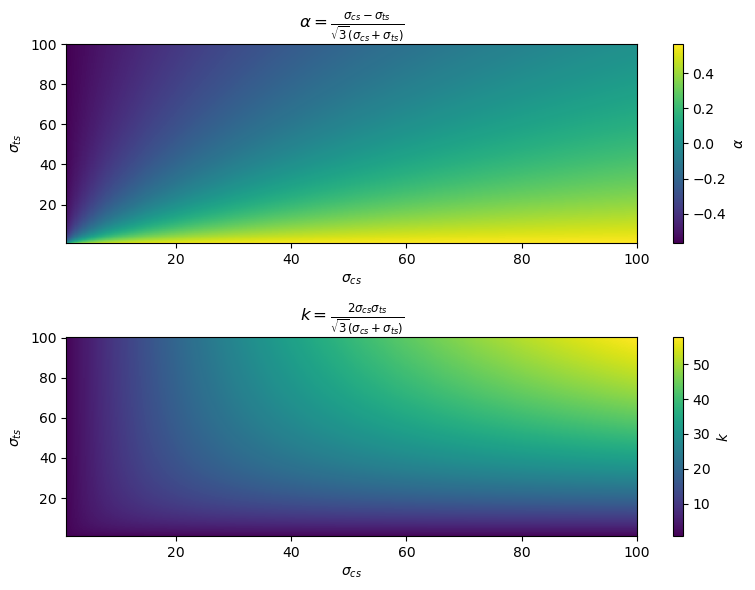

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define ranges for σ_cs and σ_ts
sigma_cs = np.linspace(1, 100, 500)
sigma_ts = np.linspace(1, 100, 500)

# Create meshgrid
CS, TS = np.meshgrid(sigma_cs, sigma_ts)

# Compute alpha
alpha = (CS - TS) / (np.sqrt(3) * (CS + TS))
k = (2 * CS * TS) / (np.sqrt(3) * (CS + TS))

# Plot
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

c0 = axs[0].pcolormesh(CS, TS, alpha, shading='auto', cmap='viridis')
fig.colorbar(c0, ax=axs[0], label=r'$\alpha$')

axs[0].set_xlabel(r'$\sigma_{cs}$')
axs[0].set_ylabel(r'$\sigma_{ts}$')
axs[0].set_title(r'$\alpha = \frac{\sigma_{cs} - \sigma_{ts}}{\sqrt{3} (\sigma_{cs} + \sigma_{ts})}$')

c1 = axs[1].pcolormesh(CS, TS, k, shading='auto', cmap='viridis')
fig.colorbar(c1, ax=axs[1], label=r'$k$')

axs[1].set_xlabel(r'$\sigma_{cs}$')
axs[1].set_ylabel(r'$\sigma_{ts}$')
axs[1].set_title(r'$k = \frac{2 \sigma_{cs} \sigma_{ts}}{\sqrt{3} (\sigma_{cs} + \sigma_{ts})}$')

plt.tight_layout()
plt.show()

$\alpha$ and $k$ as a function of $\theta$

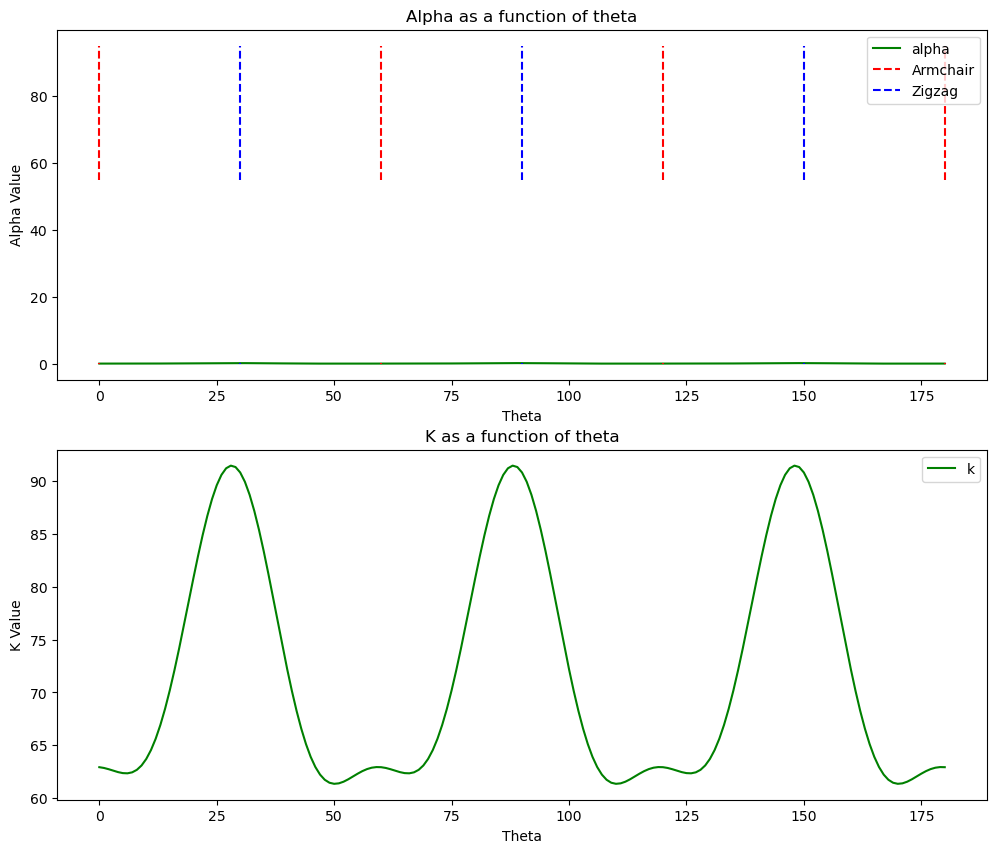

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("drucker_prager_params_thetas3D.csv")
def omega(theta):
    return 2 * np.pi * theta / 60

def alpha(theta):
    om = omega(theta)

    # First + second harmonics for alpha and k
    val = (
        df["a0"]
        + df["a1"] * np.cos(om)
        + df["a2"] * np.sin(om)
        + df["a3"] * np.cos(2 * om)
        + df["a4"] * np.sin(2 * om)
    )
    return val

def k(theta):
    om = omega(theta)

    # First + second harmonics for alpha and k
    val = (
        df["k0"]
        + df["k1"] * np.cos(om)
        + df["k2"] * np.sin(om)
        + df["k3"] * np.cos(2 * om)
        + df["k4"] * np.sin(2 * om)
    )
    return val

thetas = np.arange(0, 181, 1)
alphas = []
ks = []
for i in range(len(thetas)):
    alphas.append(alpha(i))
    ks.append(k(i))

fig, axs = plt.subplots(2, 1, figsize=(12, 10))

axs[0].plot(thetas, alphas, color='green', label='alpha')
axs[0].plot([0, 0], [0, 0.22], '--', color='red', label='Armchair')
axs[0].plot([60, 60], [0, 0.22], '--', color='red')
axs[0].plot([120, 120], [0, 0.22], '--', color='red')
axs[0].plot([180, 180], [0, 0.22], '--', color='red')
axs[0].plot([30, 30], [0, 0.22], '--', color='blue', label='Zigzag')
axs[0].plot([90, 90], [0, 0.22], '--', color='blue')
axs[0].plot([150, 150], [0, 0.22], '--', color='blue')
axs[0].set_xlabel("Theta")
axs[0].set_ylabel("Alpha Value")
axs[0].set_title("Alpha as a function of theta")
axs[0].legend()

axs[1].plot(thetas, ks, color='green', label='k')
axs[1].plot([0, 0], [55, 95], '--', color='red', label='Armchair')
axs[1].plot([60, 60], [55, 95], '--', color='red')
axs[1].plot([120, 120], [55, 95], '--', color='red')
axs[1].plot([180, 180], [55, 95], '--', color='red')
axs[1].plot([30, 30], [55, 95], '--', color='blue', label='Zigzag')
axs[1].plot([90, 90], [55, 95], '--', color='blue')
axs[1].plot([150, 150], [55, 95], '--', color='blue')
axs[1].set_xlabel("Theta")
axs[1].set_ylabel("K Value")
axs[1].set_title("K as a function of theta")
axs[1].legend()

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

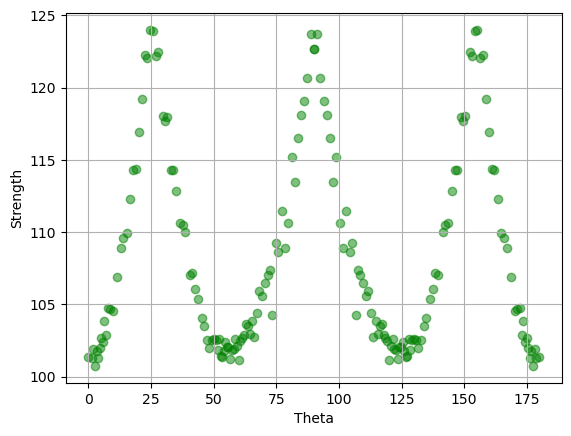

In [74]:
from filter_csv import filter_data
import local_config
import pandas as pd
import matplotlib.pyplot as plt

# ========== USER INTERFACE ==========
folder = f'{local_config.DATA_DIR}/rotation_tests'
csv_file = f"{folder}/all_simulations.csv"

exact_filters = {
    "Num Atoms x": 60,
    "Num Atoms y": 60,
    "Defects": "None",  # will match NaN or "None"
    # "Defect Percentage": 0.5,
    # "Defect Random Seed": 3,
    # "Theta Requested": 0
    # "Strain Rate x": 0.001,
    # "Strain Rate y": 0.001
}

range_filters = {
    # "Defect Percentage": (0.4, 0.6),
    # "Defect Random Seed": (0, 10)
    # "Theta Requested": (90, 90),
    # "Sigma_1": (4, 20)
}

or_filters = {
    # "Defect Type": ["SV", "DV"],
    # "Theta Requested": [0, 60]
}
# ====================================
df = pd.read_csv(csv_file)
filtered_df = filter_data(df, exact_filters=exact_filters, range_filters=range_filters, or_filters=or_filters, flip_strengths=False)

optimal_rows = []
for angle in range(0, 91, 1):
    this_df = filter_data(filtered_df, exact_filters={"Theta Requested": angle})
    
    if this_df.empty:
        continue  # skip if no data for this angle

    this_df = this_df.copy()
    this_df["ratio"] = this_df["Strength_2"] / this_df["Strength_1"]

    # Find the row with the minimum ratio
    min_row = this_df.loc[this_df["ratio"].idxmin()]

    # Append the row to the list
    optimal_rows.append(min_row)

# Combine all optimal rows into a single DataFrame
optimal_df = pd.DataFrame(optimal_rows)

# mirror across 90°: mirror(θ) = 180 - θ
mirrored_df = optimal_df.copy()
mirrored_df["Theta"] = 180 - mirrored_df["Theta"]
final_df = pd.concat([optimal_df, mirrored_df], ignore_index=True)


# plt.scatter(result["Theta Requested"], result["Strength_1"], color='blue', alpha=0.5)
plt.scatter(final_df["Theta"], final_df["Strength_1"], color='green', alpha=0.5)

plt.xlabel("Theta")
plt.ylabel("Strength")
plt.grid()
plt.show


Here we pin the function at the peak and the valley

k0=112.353678, k1=-12.763510, k2=1.675959, k3=0.153772, k4=0.200477


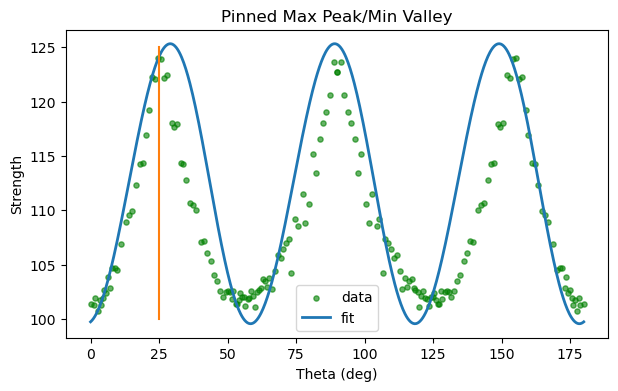

In [97]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# test data
df = final_df.copy()

theta_data = final_df["Theta"].to_numpy()
y_data = final_df["Strength_1"].to_numpy()

# define omega
def omega(theta_deg):
    return 2 * np.pi * theta_deg / 60.0

# model with constraint: k2 = 2*k4
def k_model(theta_deg, params):
    k0, k1, k2, k3, k4 = params   # t = k4
    # k2 = 2 * t
    # k4 = t
    w = omega(theta_deg)
    return (k0
            + k1 * np.cos(w)
            + k2 * np.sin(w)
            + k3 * np.cos(2 * w)
            + k4 * np.sin(2 * w))

# # Define centers for peaks and valleys
# peak_centers = np.array([30, 90, 150])
# valley_centers = np.array([0, 60, 120, 180])

# # Helper to find index of max/min near a center
# def find_nearby_index(theta_arr, y_arr, center, radius=5, mode="max"):
#     # Compute angular distance accounting for wraparound
#     dist = np.abs((theta_arr - center + 180) % 360 - 180)
#     mask = dist <= radius
#     if not np.any(mask):
#         return None
#     if mode == "max":
#         return np.argmax(y_arr[mask]) + np.where(mask)[0][0]
#     elif mode == "min":
#         return np.argmin(y_arr[mask]) + np.where(mask)[0][0]

# # Find pin indices
# pin_indices = []
# for center in peak_centers:
#     idx = find_nearby_index(theta_data, y_data, center, radius=5, mode="max")
#     if idx is not None:
#         pin_indices.append(idx)
# for center in valley_centers:
#     idx = find_nearby_index(theta_data, y_data, center, radius=5, mode="min")
#     if idx is not None:
#         pin_indices.append(idx)

# Loss function with pins

pin_indices = [np.argmax(y_data), np.argmin(y_data)]  # peak + valley
pin_weight = 1e6

def loss(params):
    pred = k_model(theta_data, params)
    sse = np.sum((y_data - pred)**2)

    pin_penalty = 0
    for idx in pin_indices:
        pin_penalty += (k_model(theta_data[idx], params) - y_data[idx])**2

    return sse + pin_weight * pin_penalty

# def loss(params):
#     residuals = y_data - k_model(theta_data, params)
#     return np.sum(residuals**2)


# initial guess
x0 = [np.mean(y_data), 0.0, 0.0, 0.0, 0.0]

# fit using BFGS (same as your large-scale app)
result = minimize(loss, x0, method="Powell")

if result.success:
    k0, k1, k2, k3, k4 = result.x
    # k2 = 2 * t
    # k4 = t
    print(f"k0={k0:.6f}, k1={k1:.6f}, k2={k2:.6f}, k3={k3:.6f}, k4={k4:.6f}")
else:
    raise RuntimeError(f"Fit failed: {result.message}")

# plot
theta_grid = np.linspace(0, 180, 721)
plt.figure(figsize=(7,4))
plt.scatter(theta_data, y_data, s=14, alpha=0.6, label="data", c='g')
plt.plot(theta_grid, k_model(theta_grid, [k0, k1, k2, k3, k4]), label="fit", linewidth=2)
plt.plot([25, 25], [100, 125])
# plt.plot(theta_grid, k_model(theta_grid, [110, -12.2, 0, 2.8, 0]), label="maybe", linewidth=2)

plt.title("Pinned Max Peak/Min Valley")

plt.xlabel("Theta (deg)")
plt.ylabel("Strength")
plt.legend()
plt.show()


This is what we have now but up to 4th order harmonics. Does not get much better

[ 1.12360222e+02 -1.27619221e+01  1.67563611e+00  1.53475897e-01
  2.00475266e-01 -1.17033386e-02 -2.10811882e-03  2.96856407e-03
  8.61442783e-05  6.25115375e-04  2.54018822e-04  1.68839660e-04
  7.85891629e-05 -3.19657918e-05  5.21691095e-06  5.81808669e-05
  1.69693068e-05 -2.65135536e-05  7.30452485e-06 -2.90334352e-05
 -2.68170407e-05  2.25756714e-05 -2.72914542e-04 -8.49201197e-06
  2.13411234e-05 -5.93724356e-05 -1.78838994e-06 -8.14155701e-07
  1.81389166e-05  1.91304402e-04 -1.05475550e-04 -1.57825582e-04
  9.94272628e-05 -7.28951098e-06 -5.21350562e-05 -1.61469954e-06
 -1.38803868e-05 -2.25395414e-04 -6.69215800e-05 -3.39850943e-05
 -2.84764789e-05]


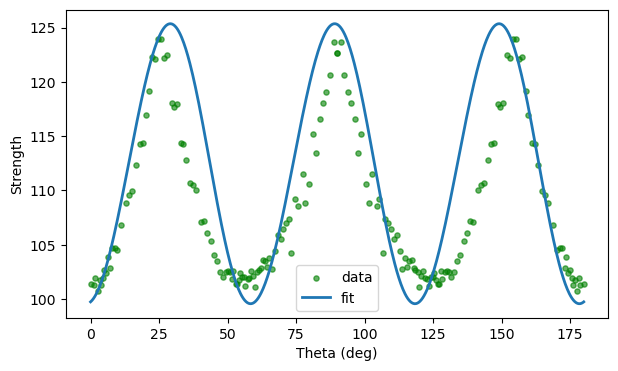

In [105]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# test data
df = final_df.copy()
theta_data = df["Theta"].to_numpy()
y_data = df["Strength_1"].to_numpy()

N = 20  # max harmonic order
x0 = np.zeros(2 * N + 1)  # initial guess


def k_model(theta_deg, params, N):
    """
    Generalized Fourier series up to order N.
    params: [k0, k1, k2, ..., k_{2N}]
        - k0: constant term
        - k_{2m-1}: cosine coefficient for m-th harmonic
        - k_{2m}: sine coefficient for m-th harmonic
    """
    w = 2 * np.pi * theta_deg / 60.0  # 60° period
    k0 = params[0]
    total = np.full_like(theta_deg, k0, dtype=float)

    for m in range(1, N + 1):
        cos_coeff = params[2 * m - 1]
        sin_coeff = params[2 * m]
        total += cos_coeff * np.cos(m * w) + sin_coeff * np.sin(m * w)

    return total


pin_indices = [np.argmax(y_data), np.argmin(y_data)]  # peak + valley
pin_weight = 1e6

def loss(params):
    pred = k_model(theta_data, params, N)
    sse = np.sum((y_data - pred)**2)

    pin_penalty = 0
    for idx in pin_indices:
        pin_penalty += (k_model(theta_data[idx], params, N) - y_data[idx])**2

    return sse + pin_weight * pin_penalty

# # loss = sum of squared residuals (same as in large-scale code)
# def loss(params):
#     residuals = y_data - k_model(theta_data, params, N)
#     return np.sum(residuals**2)

# fit using BFGS (same as your large-scale app) -- changed to powell
result = minimize(loss, x0, method="Powell")

if result.success:
    params_opt = result.x
    print(params_opt)
else:
    raise RuntimeError(f"Fit failed: {result.message}")

# plot
theta_grid = np.linspace(0, 180, 721)
plt.figure(figsize=(7,4))
plt.scatter(theta_data, y_data, s=14, alpha=0.6, label="data", c='g')
plt.plot(theta_grid, k_model(theta_grid, params_opt, N), label="fit", linewidth=2)
plt.xlabel("Theta (deg)")
plt.ylabel("Strength")
plt.legend()
plt.show()


Spliced exponentials:

Fit successful:
a = 71.4338, b = 0.0213, theta0 = 30.0000°


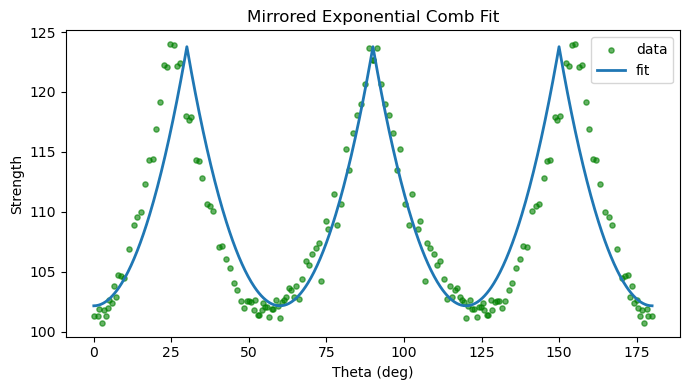

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Data: expects final_df with columns "Theta" and "Strength_1"
df = final_df.copy()
theta_data = df["Theta"].to_numpy()
y_data = df["Strength_1"].to_numpy()

# Define wrapped angular distance: output in [0, 180]
def wrapped_distance(theta, center):
    return np.abs((theta - center + 180) % 360 - 180)

# Mirrored exponential comb: periodic peaks every 60°
def mirrored_exp_comb(theta_deg, a, b, theta0_deg):
    centers = [(theta0_deg + 60 * m) % 360 for m in range(6)]
    result = np.zeros_like(theta_deg, dtype=float)
    for c in centers:
        dist = wrapped_distance(theta_deg, c)
        result += a * np.exp(-b * dist)
    return result

# Loss function for fitting [a, b, theta0]
def loss(params):
    a, b, theta0 = params
    pred = mirrored_exp_comb(theta_data, a, b, theta0)
    residuals = y_data - pred
    return np.sum(residuals**2)

# Initial guess
a0 = np.max(y_data)
b0 = 0.1
theta0_0 = 30.0  # expected center of peak
x0 = [a0, b0, theta0_0]

# Bounds to keep params sane
bounds = [(0, None),      # a ≥ 0
          (1e-4, 10.0),   # b > 0
          (0.0, 60.0)]    # theta0 within one period

# Fit
result = minimize(loss, x0, method="Powell", bounds=bounds)

if result.success:
    a, b, theta0 = result.x
    print(f"Fit successful:\na = {a:.4f}, b = {b:.4f}, theta0 = {theta0:.4f}°")
else:
    raise RuntimeError("Fit failed: " + result.message)

# Plot
theta_grid = np.linspace(0, 180, 721)
fit_curve = mirrored_exp_comb(theta_grid, a, b, theta0)

plt.figure(figsize=(7, 4))
plt.scatter(theta_data, y_data, s=14, alpha=0.6, label="data", c='g')
plt.plot(theta_grid, fit_curve, label="fit", linewidth=2)
plt.xlabel("Theta (deg)")
plt.ylabel("Strength")
plt.legend()
plt.title("Mirrored Exponential Comb Fit")
plt.tight_layout()
plt.show()


Spliced Quadratics:

Fit successful:
a = 21.5442, c = 102.0956, theta0 = 0.0001°


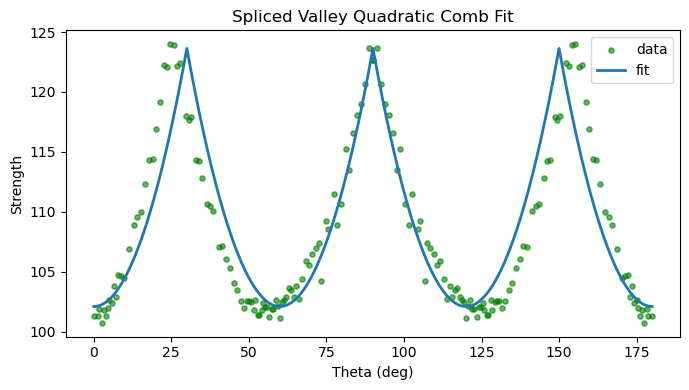

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Data
df = final_df.copy()
theta_data = df["Theta"].to_numpy()
y_data = df["Strength_1"].to_numpy()

def wrapped_distance(theta, center):
    return (theta - center + 180) % 360 - 180

def spliced_valley_quad(theta_deg, a, c, theta0_deg):
    """
    Spliced quadratic valleys centered at 0, 60, ..., offset by theta0_deg.
    Each segment spans 60° and connects at 30°, 90°, ...
    """
    theta_deg = np.asarray(theta_deg)
    output = np.zeros_like(theta_deg, dtype=float)

    # Centers every 60° starting from theta0
    centers = [(theta0_deg + 60 * m) % 360 for m in range(6)]

    for mu in centers:
        d = wrapped_distance(theta_deg, mu)
        mask = np.abs(d) <= 30  # within 30° of center
        output[mask] = a * (d[mask] / 30.0)**2 + c

    return output

# Loss function: fit a, c, and theta0
def loss(params):
    a, c, theta0 = params
    pred = spliced_valley_quad(theta_data, a, c, theta0)
    residuals = y_data - pred
    return np.sum(residuals**2)

# Initial guess
a0 = 1.0
c0 = np.min(y_data)
theta0_0 = 0.0
x0 = [a0, c0, theta0_0]

# Bounds
bounds = [(0, None),     # a > 0 for upward parabola
          (None, None),  # c: free
          (0.0, 60.0)]   # theta0 in one period

# Fit
result = minimize(loss, x0, method="Powell", bounds=bounds)

if result.success:
    a, c, theta0 = result.x
    print(f"Fit successful:\na = {a:.4f}, c = {c:.4f}, theta0 = {theta0:.4f}°")
else:
    raise RuntimeError("Fit failed: " + result.message)

# Plot
theta_grid = np.linspace(0, 180, 721)
fit_curve = spliced_valley_quad(theta_grid, a, c, theta0)

plt.figure(figsize=(7, 4))
plt.scatter(theta_data, y_data, s=14, alpha=0.6, label="data", c='g')
plt.plot(theta_grid, fit_curve, label="fit", linewidth=2)
plt.xlabel("Theta (deg)")
plt.ylabel("Strength")
plt.title("Spliced Valley Quadratic Comb Fit")
plt.legend()
plt.tight_layout()
plt.show()

